## Clustering

tidak ada target

dari data yang kita berikan (fitur), pilih algoritma, set parameter algoritma, dapatkan hasil pengelompokan data

di contoh kali ini kita gunakan alg KMeans, datanya Student Performance


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

In [2]:
df_student = pd.read_csv("dataset/StudentsPerformance.csv")
df_student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [3]:
df_student.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
# misalnya data kita dari skor2 studentnya
X = df_student[['math score', 'reading score', 'writing score']]

In [7]:
# buat dan latih model
# set parameter, untuk KMeans kita perlu pilih jumlah cluster
model_student_kmeans = KMeans(n_clusters=5, )

# latih model
model_student_kmeans.fit(X)

C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


,n_clusters,5
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


In [8]:
# buat prediksi
model_student_kmeans.predict(X)

array([4, 1, 1, 0, 4, 4, 1, 3, 2, 0, 0, 3, 4, 4, 0, 4, 1, 3, 3, 0, 2, 2,
       0, 4, 4, 4, 0, 2, 2, 2, 4, 2, 2, 3, 1, 4, 4, 0, 1, 0, 0, 2, 0, 2,
       0, 0, 2, 4, 2, 1, 0, 4, 0, 4, 4, 3, 1, 0, 0, 3, 4, 3, 0, 4, 0, 2,
       3, 2, 0, 0, 2, 2, 0, 0, 0, 3, 3, 4, 2, 2, 0, 0, 0, 2, 3, 4, 1, 4,
       2, 4, 2, 3, 4, 0, 1, 4, 2, 2, 2, 2, 4, 4, 1, 0, 1, 2, 1, 2, 2, 2,
       1, 0, 0, 0, 1, 4, 4, 4, 0, 2, 1, 1, 1, 0, 4, 1, 2, 4, 4, 0, 1, 3,
       4, 4, 4, 0, 0, 2, 2, 2, 4, 2, 0, 0, 4, 3, 1, 2, 4, 1, 2, 4, 2, 0,
       2, 1, 4, 2, 4, 2, 4, 1, 0, 0, 1, 1, 0, 4, 4, 4, 4, 1, 1, 2, 0, 1,
       0, 4, 2, 1, 2, 0, 0, 2, 0, 2, 4, 2, 0, 1, 2, 4, 2, 2, 4, 0, 2, 0,
       0, 4, 4, 4, 4, 2, 0, 4, 2, 4, 4, 2, 4, 3, 0, 0, 1, 4, 1, 3, 4, 0,
       2, 4, 2, 4, 2, 0, 4, 0, 2, 1, 2, 3, 4, 1, 1, 4, 2, 2, 0, 4, 2, 1,
       0, 0, 4, 4, 4, 2, 2, 2, 0, 4, 2, 4, 0, 2, 2, 4, 4, 4, 4, 4, 0, 1,
       4, 0, 4, 4, 1, 4, 2, 0, 0, 2, 1, 4, 1, 2, 4, 2, 0, 0, 4, 4, 3, 4,
       1, 4, 4, 4, 4, 4, 2, 4, 4, 2, 3, 4, 3, 1, 4,

In [9]:
df_student['cluster_group'] = model_student_kmeans.predict(X)

In [10]:
df_student.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,cluster_group
0,female,group B,bachelor's degree,standard,none,72,72,74,4
1,female,group C,some college,standard,completed,69,90,88,1
2,female,group B,master's degree,standard,none,90,95,93,1
3,male,group A,associate's degree,free/reduced,none,47,57,44,0
4,male,group C,some college,standard,none,76,78,75,4


In [16]:
# df_student.loc[df_student['cluster_group'] == 0, 'math score']

In [12]:
df_student['cluster_group'].value_counts()

cluster_group
2    284
4    271
0    220
1    168
3     57
Name: count, dtype: int64

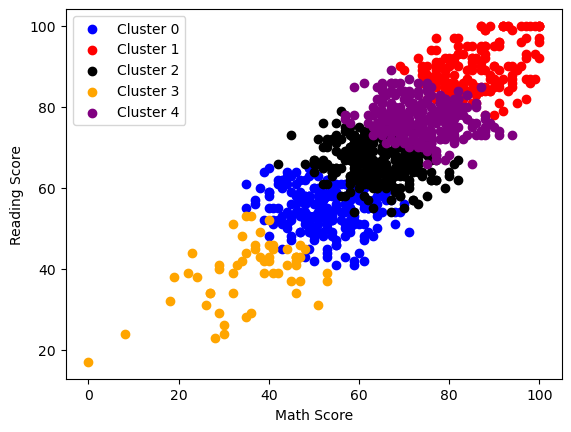

In [20]:
# visualisasi menggunakan plot
# cluster center
model_student_kmeans.cluster_centers_

# plot dengan warna berbeda per cluster
colors = ['blue', 'red', 'black', 'orange', 'purple']
# plot kosong
plt.figure()
for cluster in range(5):
    kc = df_student['cluster_group'] == cluster
    plt.scatter(df_student.loc[kc, 'math score'],
                df_student.loc[kc, 'reading score'],
                color=colors[cluster],
                label=f'Cluster {cluster}'
                )

plt.xlabel('Math Score')
plt.ylabel('Reading Score')
plt.legend()
plt.show()

kalau dari visual yang kita gunakan - 2 fitur, per cluster warna berbeda, sepertinya data kita terbagi dengan baik tapi tidak perlu sampai 5 cluster


Jumlah k Cluster yang optimal bisa kita cari menggunakan `elbow method` dimana kita test modelnya dengan k=1, ... bebas misalnya 100

kita gunakan angka inertia, atau wcss, yang merupakan representasi jarak dari titik tengah cluster ke data2 di dalam cluster tersebut. kita coba optimalkan total jarak ini.

- inertia (harusnya sama dengan wcss) bisa didapat dari fungsi bawaan sklearn
- wcss juga bisa dihitung manual seperti orang ini https://stackoverflow.com/questions/72236122/elbow-method-for-k-means-in-python


C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmea

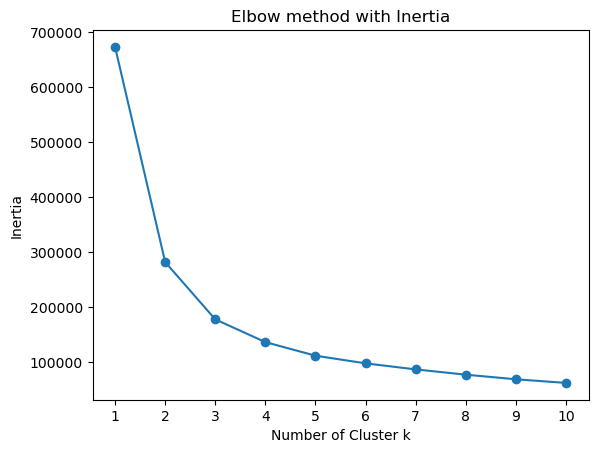

In [22]:
# k = 1 -10
k_values = range(1, 11)
inertias = []

for k in k_values:
    model_km = KMeans(n_clusters=k)
    model_km.fit(X)
    inertias.append(model_km.inertia_)

# plot
# x-axis jumlah k
# y axis jumlah inertia
plt.figure()
plt.plot(k_values, inertias, marker="o")

plt.xticks(k_values)

plt.xlabel("Number of Cluster k")
plt.ylabel("Inertia")
plt.title("Elbow method with Inertia")
plt.show()

In [23]:
np.diff(inertias, n=2)

array([287144.9050612 ,  62875.36343976,  16636.33397029,  10789.8008301 ,
         2913.57924968,   1406.24825883,   1234.26219798,   1739.27075069])